# Ridge Regression

In [1]:
library('ISLR')

In [5]:
sum(is.na(Hitters$Salary))
dim(Hitters)

[1] 59

[1] 322  20

In [6]:
Hitters = na.omit(Hitters)
dim(Hitters)

[1] 263  20

In [12]:
X = model.matrix(Salary~., Hitters)[,-1]  # Automatically converts qualitavive variables into dummy variables.
Y = Hitters$Salary 

In [20]:
library('glmnet')
grid = 10^ seq(10,-2,length=100)

In [21]:
# glmnet() automatically standardize the variable. To turn off pass an argument standardize=FALSE.
ridge.mod = glmnet(X,Y, alpha=0, lambda=grid) # alpha=0 for ridge and 1 for lasso.

In [23]:
names(ridge.mod)

[1] "a0"        "beta"      "df"        "dim"       "lambda"    "dev.ratio"
 [7] "nulldev"   "npasses"   "jerr"      "offset"    "call"      "nobs"

In [25]:
dim(coef(ridge.mod))  # Coefficent of all 19 variables + intercept corresponding to 100 values of lambda.

[1]  20 100

In [26]:
# We can use predict function for a number of purposes. For instance to get coefficients for new value of lambda=50.
predict(ridge.mod,s=50, type="coefficients")

20 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  4.876610e+01
AtBat       -3.580999e-01
Hits         1.969359e+00
HmRun       -1.278248e+00
Runs         1.145892e+00
RBI          8.038292e-01
Walks        2.716186e+00
Years       -6.218319e+00
CAtBat       5.447837e-03
CHits        1.064895e-01
CHmRun       6.244860e-01
CRuns        2.214985e-01
CRBI         2.186914e-01
CWalks      -1.500245e-01
LeagueN      4.592589e+01
DivisionW   -1.182011e+02
PutOuts      2.502322e-01
Assists      1.215665e-01
Errors      -3.278600e+00
NewLeagueN  -9.496680e+00

# Split data into training and test set and fine MSE

In [27]:
set.seed(1)
train = sample(1:nrow(X),nrow(X)/2)
test = (-train)

In [60]:
ridge.mod = glmnet(X[train,], Y[train], alpha=0,lambda=grid)

[1] "lambda"     "cvm"        "cvsd"       "cvup"       "cvlo"      
 [6] "nzero"      "name"       "glmnet.fit" "lambda.min" "lambda.1se"

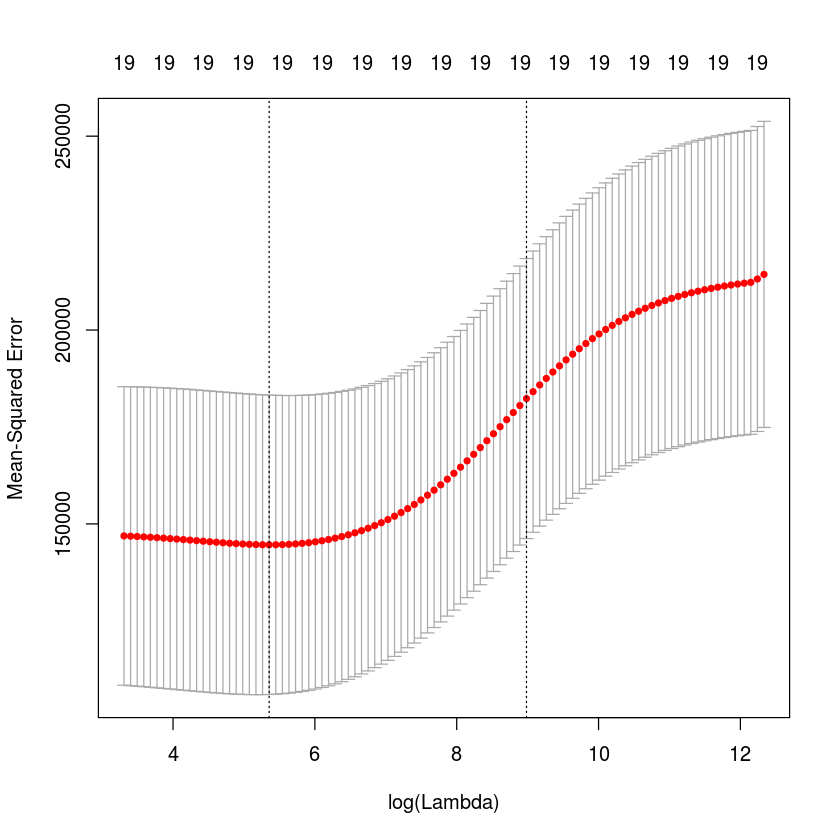

In [51]:
set.seed(1)
cv.error = cv.glmnet(X[train,],Y[train],alpha=0)
names(cv.error)
plot(cv.error)

In [52]:
bestlambda = cv.error$lambda.min
bestlambda

[1] 211.7416

In [53]:
# MSE on best lambda
ridge.pred = predict(ridge.mod,s=bestlambda,newx=X[test,])
mean((ridge.pred-Y[test])^2)

[1] 96012.47

In [56]:
# Compare with ordianry least square model
ridge.pred = predict(ridge.mod, s=0, newx=X[test,], exact=T)
mean((Y[test]-ridge.pred)^2)

ERROR: Error: used coef.glmnet() or predict.glmnet() with `exact=TRUE` so must in addition supply original argument(s)  x and y  in order to safely rerun glmnet


### Finally re-fit ridge regression model on full data set with bestlambda

In [43]:
ridge.fit = glmnet(X,Y, alpha=0)
predict(ridge.fit, s=bestlambda, type="coefficients")

20 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)   9.88487157
AtBat         0.03143991
Hits          1.00882875
HmRun         0.13927624
Runs          1.11320781
RBI           0.87318990
Walks         1.80410229
Years         0.13074383
CAtBat        0.01113978
CHits         0.06489843
CHmRun        0.45158546
CRuns         0.12900049
CRBI          0.13737712
CWalks        0.02908572
LeagueN      27.18227527
DivisionW   -91.63411282
PutOuts       0.19149252
Assists       0.04254536
Errors       -1.81244470
NewLeagueN    7.21208394

# Lasso Regression

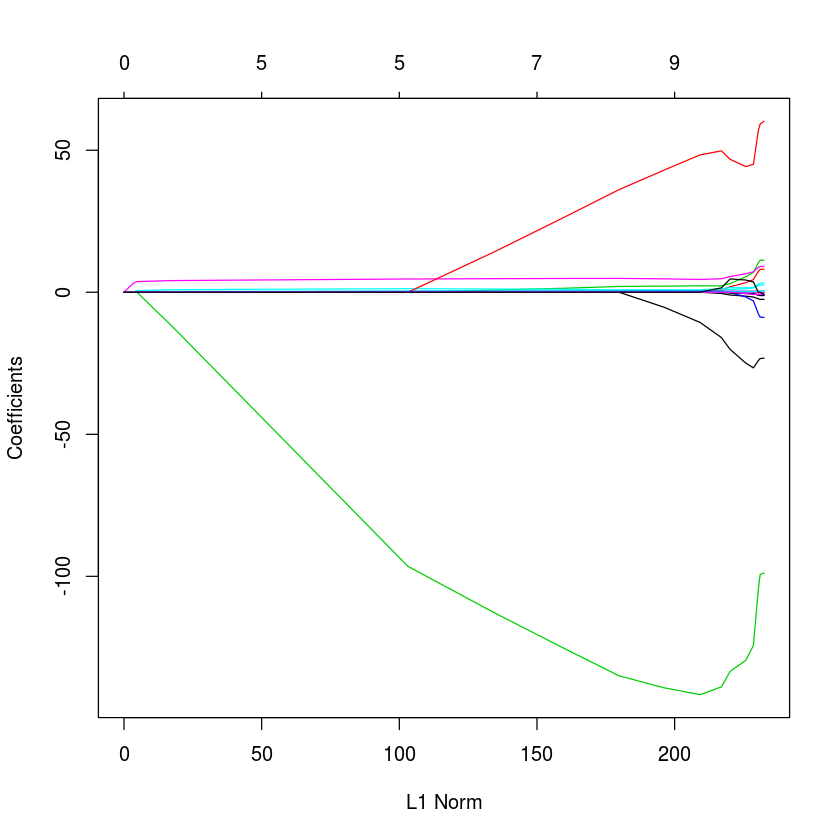

In [59]:
lasso.mod = glmnet(X[train,],Y[train], alpha=1, lambda=grid)
plot(lasso.mod)

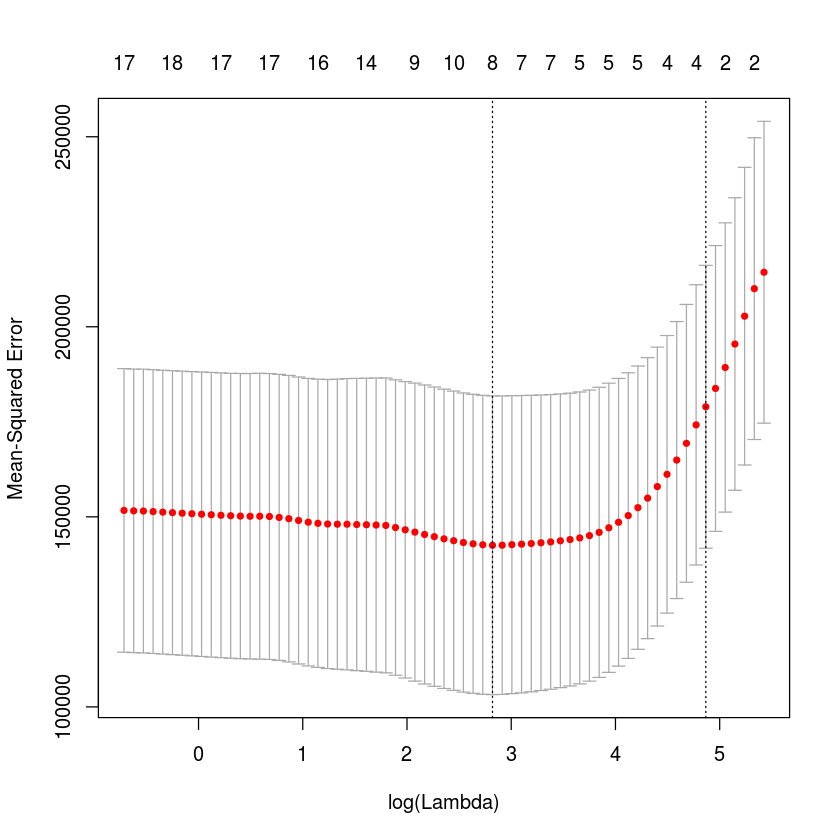

In [61]:
set.seed(1)
cv.error = cv.glmnet(X[train,], Y[train], alpha=1)
plot(cv.error)

In [62]:
bestlambda = cv.error$lambda.min
bestlambda

[1] 16.78016

In [63]:
lasso.pred = predict(lasso.mod,s=bestlambda, newx=X[test,])
mean((lasso.pred-Y[test])^2)

[1] 100743.4

In [67]:
# Now re-fit the model on full data set
lasso.fit = glmnet(X,Y, alpha=1, lambda=grid)
lasso.coef = predict(lasso.fit,s=bestlambda, alpha=1,type="coefficients")
lasso.coef

20 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)   18.5394844
AtBat          .        
Hits           1.8735390
HmRun          .        
Runs           .        
RBI            .        
Walks          2.2178444
Years          .        
CAtBat         .        
CHits          .        
CHmRun         .        
CRuns          0.2071252
CRBI           0.4130132
CWalks         .        
LeagueN        3.2666677
DivisionW   -103.4845458
PutOuts        0.2204284
Assists        .        
Errors         .        
NewLeagueN     .        

### Lasso Model choosed only 7 variables.